## Week 2_Day 1: Sklearn basics + Linear & Logistic Regression

### Library Import, Load and Clean Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing(as_frame=True)
df = dataset.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.shape

(20640, 9)

### Data Fitting and Splitting

In [4]:
x = df.drop(columns=['MedHouseVal'])  # features
y = df['MedHouseVal']                 # target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=420
)

### Fit, Predict & Evaluate using Linear Regression Model

In [6]:
model_linreg = LinearRegression()
model_linreg.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = model_linreg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.5202857882372669
R-squared score: 0.6070519584922172


### Simpler Regression Sample

In [ ]:
rng = np.random.RandomState(0)
X_small = rng.rand(100, 1) * 10  # 0–10
y_small = 3 * X_small.squeeze() + 5 + rng.randn(100)  # y = 3x+5+noise


X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

lin_small = LinearRegression()
lin_small.fit(X_train, y_train)

print("coef:", lin_small.coef_, "intercept:", lin_small.intercept_)

coef: [2.99805182] intercept: 5.20634018871143


In [11]:
dfs = pd.DataFrame({
    "x": X_small.squeeze(),   # or X_small[:, 0]
    "y": y_small
})

dfs.head()

,x,y
0,5.488135,20.299255
1,7.151894,27.356507
2,6.027634,23.548564
3,5.448832,19.810252
4,4.236548,19.197896


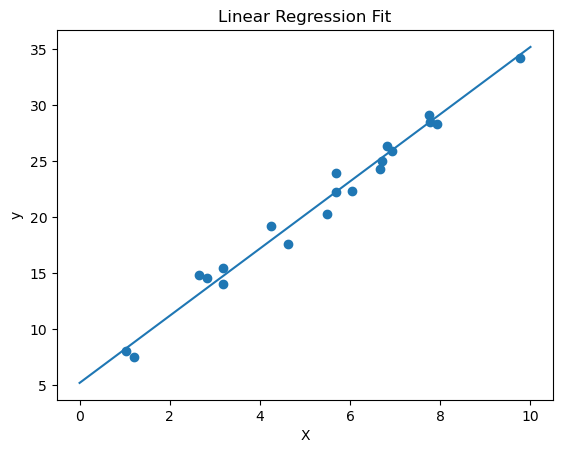

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
x_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = lin_small.predict(x_line)
plt.plot(x_line, y_line)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.show()


### Logistic Regression

In [12]:
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer(as_frame=True)
dfc = cancer_dataset.frame

dfc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
a = dfc.drop(columns=['target'])
b = dfc['target']

a_train, a_test, b_train, b_test = train_test_split(
    a, b, test_size=0.2, random_state=420, stratify=b
)

In [21]:
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(a_train, b_train)

LogisticRegression(max_iter=5000)

In [22]:
b_pred = log_reg.predict(a_test)
acc = accuracy_score(b_test, b_pred)
cm = confusion_matrix(b_test, b_pred)

print("Accuracy", acc)
cm

Accuracy 0.9385964912280702


array([[38,  4],
       [ 3, 69]])

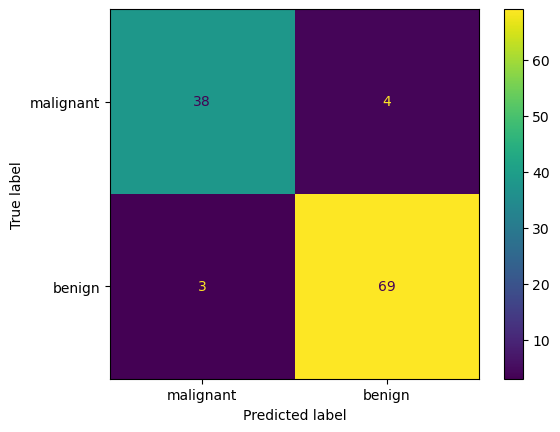

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_dataset.target_names)
disp.plot()